<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Plotting a steady flow field

In this notebook we will discuss ways that we plot a flow field. We will first discuss velocity profiles. Then, we will inspect the pre-computed steady flow past an airfoil again.

### Set up the module

In [1]:
using MAE150A

┌ Info: Precompiling MAE150A [a017625c-406c-46ee-99d6-0fac6062339e]
└ @ Base loading.jl:1278


In [2]:
using Plots

   Building Conda ─→ `~/.julia/packages/Conda/x5ml4/deps/build.log`
   Building PyCall → `~/.julia/packages/PyCall/tqyST/deps/build.log`


### Velocity profiles
One of the most basic ways that we plot a flow field is by plotting a **velocity profile**. This gives us a means of seeing how the flow speed varies with position.

As an example, let us consider the most basic of flowfields: the steady Couette flow. This is the flow generated between two parallel walls, when one of the walls is in motion and the other one is at rest. The velocity field is steady and *unidirectional*: it only moves in one direction (the $x$ direction, parallel to the walls). The velocity field has only one component, in the $x$ direction, and varies only with distance from the lower wall $y = 0$. 

$$u(y) = U y/H$$

where $U$ is the speed of the upper wall and $H$ is the height of the gap between the walls.

We plot the velocity profile opposite to how we would usually plot a function: with $u$ on the horizontal axis and $y$ on the vertical axis. Also, it is far preferred to plot this **nondimensionally**: plot $u/U$ vs $y/H$. This ensures that the plot can be understood more universally, rather than specific to just one wall speed and one gap height.

In Julia, one useful idea is to define a function with *keyword arguments* that take default values if we omit them. Here, we will use this to define the velocity function so that it can behave either dimensionally (by setting $U$ and $H$ explicity) or nondimensionally (by not setting them, so that $U$ and $H$ each default to 1). By doing the latter, then '$y$' actually represents $y/H$ and '$u$' represents $u/U$.

In [3]:
u_couette(y;U=1,H=1) = U*y/H

u_couette (generic function with 1 method)

Now generate a set of points in $y$ (between 0 and 1), evaluate $u$, and plot the profile:

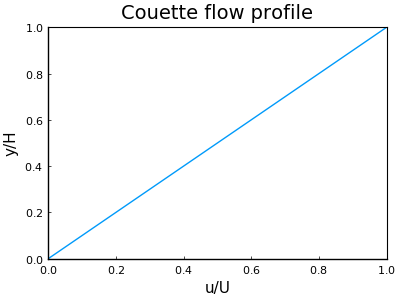

In [4]:
y = 0:0.01:1
plot(u_couette.(y),y,xlims=(0,1),ylims=(0,1),xguide="u/U",yguide="y/H",framestyle=:box,title="Couette flow profile")

It should be understood that this profile signifies that the flow is going horizontally, remains at rest at the bottom $y=0$, and is fastest at the top $y = H$.

A channel Poiseuille flow profile would be parabolic:

In [5]:
u_pois(y;U=1,H=1) = 4*U*y*(H-y)

u_pois (generic function with 1 method)

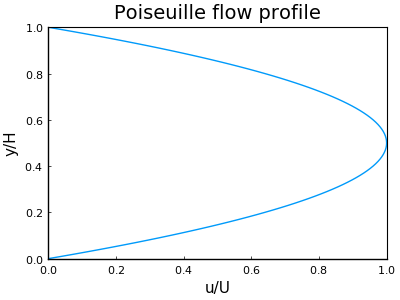

In [8]:
plot(u_pois.(y),y,xlims=(0,1),ylims=(0,1),xguide="u/U",yguide="y/H",framestyle=:box,title="Poiseuille flow profile")

### Other ways we visualize a flow
The velocity profile is only one way to understand a flow, and it only is helpful in certain circumstances, such as near a wall. For more complex flows, we need some additional tools to visualize a flow.

We will use the flow from the same pre-computed CFD solution we used in the previous notebook. This is the steady state flow past a NACA 4415 airfoil at 5 degrees angle of attack at Reynolds number 500.

In [ ]:
filename = "NACA4415Re500.jld"
u, t, sys = load_ns_solution(filename);

Get the flow fields associated with the flow state: velocity (`vel`), vorticity (`ω`), streamfunction (`ψ`), and pressure (`press`)

In [ ]:
vel = ViscousFlow.velocity(u,sys,t)
ω = ViscousFlow.vorticity(u,sys,t)
ψ = ViscousFlow.streamfunction(u,sys,t)
press = ViscousFlow.pressure(u,sys,t);

### Plotting the vorticity field

In [ ]:
# plot it
plot(ω,sys,levels=range(-15,15,length=30), color = :RdBu,clim=(-15,15),ylim=(-1,1),xlim=(-1,3),size=(900,300),title="Vorticity field")

### Plot the streamfunction field
In this case, we also will create a line contour plot, but use the same color for each contour. Why do we do this? Maybe you have a guess once you look at it.

In [ ]:
plot(ψ,sys,levels=31, color = :Black, xlim = (-1,3),ylim=(-0.5,0.5),size=(900,400),title="Streamfunction field")

### Plot the velocity field components
This is a vector field, so we will plot the components separately.

In [ ]:
plot(
    plot(vel.u,sys,size=(900,300),levels=range(-0.1,1.5,length=31), color = :RdBu,clim=(-0.1,1.5),xlim=(-1,3),ylim=(-0.5,0.5),title="x component of velocity"),
    plot(vel.v,sys,size=(900,300),color=:RdBu,levels=range(-0.15,0.15,length=31),clim=(-0.15,0.15),xlim=(-1,3),ylim=(-0.5,0.5),title="y component of velocity"),
    layout=(2,1),
    size=(800,400)
    )


### Plot the magnitude of the velocity field
This field is the speed of the flow.

In [ ]:
umag = mag(vel)
plot(umag,sys,color = :RdBu, ylim = (-0.5,0.5),xlim = (-1,3),size=(900,400),title="Velocity magnitude field",colorbar=:true)

Notice that the wake is clearly shown in this field, distinctly slower than the rest of the flow.

### Pressure coefficient field
Now let's plot the pressure coefficient field. The pressure coefficient $C_p$ is just a normalization of the pressure:

$$C_p = \dfrac{p-p_\infty}{\frac{1}{2} \rho U_\infty^2}$$

In this case, the free stream and density are both equal to 1, so we just divide pressure by 0.5 (i.e., multiply pressure by 2) to get the pressure coefficient.

In [ ]:
plot(2*press,sys,levels=range(-1.5,1.5,length=31),color=:RdBu,clim=(-1.5,1.5),xlim=(-1,1),ylim=(-0.5,0.5),
        colorbar=:true,size=(900,400),title="Pressure coefficient")

There are two notable features in the pressure. Along the upper part of the wing, the pressure is very low. This is the **suction** side of the wing, where it generates most of its lift. Also, there is a region of higher pressure at the front of the wing where the flow stagnates.